In [1]:
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from scrape import model_2023

In [2]:
df2022 = extract_players("2022", "te", "PPR")
df2022

,name,RECEIVING_REC,RECEIVING_TGT,RECEIVING_YDS,RECEIVING_Y/R,RECEIVING_LG,RECEIVING_20+,RECEIVING_TD,RUSHING_ATT,RUSHING_YDS,RUSHING_TD,MISC_FL,MISC_G,MISC_FPTS,MISC_FPTS/G,MISC_ROST
Rank,,,,,,,,,,,,,,,,
1,travis-kelce,110,152,1338,12.2,52,29,12,2,5,0,1,17,316.3,18.6,100.0%
2,tj-hockenson,86,129,914,10.6,81,12,6,0,0,0,1,17,215.4,12.7,99.3%
3,george-kittle,60,86,765,12.8,54,20,11,0,0,0,1,15,200.5,13.4,99.0%
4,mark-andrews,73,113,847,11.6,36,8,5,3,8,0,0,15,190.5,12.7,99.9%
5,evan-engram,73,98,766,10.5,36,11,4,2,13,0,0,17,176.9,10.4,94.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,james-winchester,0,0,0,0.0,0,0,0,0,0,0,0,3,0.0,0.0,0.0%
231,patrick-scales,0,0,0,0.0,0,0,0,0,0,0,0,5,0.0,0.0,0.0%
232,andrew-depaola,0,0,0,0.0,0,0,0,0,0,0,0,3,0.0,0.0,0.0%


In [3]:
names2022 = list(df2022["name"].head(50))
dists2022 = make_dists(names2022, "2022", "te")
dists2022.head(20)

travis-kelce
tj-hockenson
george-kittle
mark-andrews
evan-engram
tyler-higbee
pat-freiermuth
cole-kmet
taysom-hill
dalton-schultz
david-njoku
dallas-goedert
gerald-everett
dawson-knox
juwan-johnson
tyler-conklin
noah-fant
jordan-akins
zach-ertz
robert-tonyan
hayden-hurst
hunter-henry
mike-gesicki
austin-hooper
chigoziem-okonkwo
cade-otton
isaiah-likely
will-dissly
greg-dulcich
foster-moreau
darren-waller
logan-thomas
kyle-pitts
daniel-bellinger
jelani-woods
noah-gray
colby-parkinson
brock-wright
harrison-bryant
trey-mcbride
kylen-granson
cj-uzomah
irv-smith-jr
mycole-pruitt
mo-alie-cox
tommy-tremble
jonnu-smith
jake-ferguson
adam-trautman
shane-zylstra


c:\Users\xabbo\Desktop\fantasy_scrape\scrape.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngs_data['name'] = ngs_data['PLAYER NAME'].apply(lambda x: clean_name(x))


Series([], Name: name, dtype: object)


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,std_rTD,TM TGT %,CUSHAverage Cushion (CUSH),SEPAverage Separation (SEP),TAYAverage Targeted Air Yards (TAY),TAY%% Share of Team's Air Yards (TAY%),YAC/RYAC/Reception (YAC/R),xYAC/RExpected YAC/Reception (EYAC/R),+/-Avg .YAC Above Expectation,class
0,travis-kelce,32,17,6.470588,1.943848,8.941176,2.363213,78.705882,29.891499,12.617647,...,0.0,23.3,6.3,2.9,7.3,24.23,6.2,4.8,1.4,0
1,tj-hockenson,25,17,5.058824,2.959940,7.588235,3.565502,53.764706,40.394422,10.929412,...,0.0,19.2,6.3,3.0,7.7,24.51,4.9,3.4,1.5,1
2,george-kittle,28,15,4.000000,1.712698,5.733333,2.143725,51.000000,33.093806,12.880000,...,0.0,16.8,5.6,3.3,7.3,18.21,6.8,5.2,1.5,2
3,mark-andrews,26,15,4.866667,2.729265,7.533333,2.777689,56.466667,33.304387,10.600000,...,0.0,23.2,6.0,3.1,10.0,28.45,3.7,3.5,0.2,0
4,evan-engram,27,17,4.294118,2.802619,5.764706,3.638510,45.058824,40.303949,10.164706,...,0.0,16.4,7.0,3.3,6.2,14.34,6.8,5.8,1.0,3
5,tyler-higbee,29,16,4.500000,2.850439,6.750000,3.526684,38.750000,27.864628,7.731250,...,0.0,20.3,5.7,3.5,3.1,9.33,5.7,5.5,0.2,1
6,pat-freiermuth,23,15,4.200000,2.286190,6.533333,2.753584,48.800000,25.672813,11.493333,...,0.0,17.2,6.3,2.7,8.0,17.01,4.7,3.4,1.3,1
7,cole-kmet,23,17,2.941176,1.661700,4.058824,1.862023,32.000000,20.962151,10.117647,...,0.0,18.3,5.7,4.4,6.6,14.10,6.2,6.3,-0.1,3
8,dalton-schultz,26,15,3.800000,2.256841,5.933333,2.669998,38.466667,24.722100,8.880000,...,0.0,16.0,6.1,2.9,7.3,14.28,3.9,3.5,0.4,1
9,david-njoku,26,14,4.142857,2.356060,5.714286,2.281246,44.857143,26.856383,11.200000,...,0.0,14.8,5.2,3.1,6.8,12.43,6.0,4.9,1.1,1


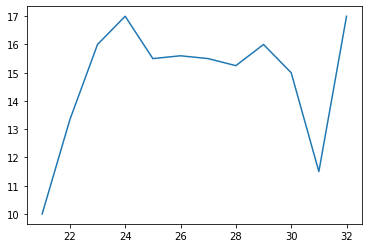

In [4]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

2021 Data

In [5]:
df2021 = extract_players("2021", "te", "PPR")

In [6]:
names2021 = list(df2021["name"].head(50))
dists2021 = make_dists(names2021, "2021", "te")
dists2021.head(20)

mark-andrews
travis-kelce
dalton-schultz
george-kittle
zach-ertz
kyle-pitts
rob-gronkowski
dallas-goedert
mike-gesicki
hunter-henry
dawson-knox
noah-fant
pat-freiermuth
tyler-higbee
tj-hockenson
tyler-conklin
darren-waller
jared-cook
cj-uzomah
cole-kmet
gerald-everett
david-njoku
evan-engram
austin-hooper
foster-moreau
mo-alie-cox
jack-doyle
cameron-brate
albert-okwuegbunam
dan-arnold
anthony-firkser
durham-smythe
geoff-swaim
ricky-seals-jones
jonnu-smith
ryan-griffin
hayden-hurst
adam-trautman
harrison-bryant
josiah-deguara
kyle-rudolph
donald-parham
brevin-jordan
logan-thomas
tommy-tremble
juwan-johnson
john-bates
jimmy-graham
james-oshaughnessy
robert-tonyan


c:\Users\xabbo\Desktop\fantasy_scrape\scrape.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngs_data['name'] = ngs_data['PLAYER NAME'].apply(lambda x: clean_name(x))


Series([], Name: name, dtype: object)


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,std_rTD,TM TGT %,CUSHAverage Cushion (CUSH),SEPAverage Separation (SEP),TAYAverage Targeted Air Yards (TAY),TAY%% Share of Team's Air Yards (TAY%),YAC/RYAC/Reception (YAC/R),xYAC/RExpected YAC/Reception (EYAC/R),+/-Avg .YAC Above Expectation,class
0,mark-andrews,25,17,6.294118,2.515007,9.000000,2.828427,80.058824,34.339945,12.858824,...,0.000000,25.2,6.4,3.1,10.5,30.51,4.5,3.9,0.6,0
1,travis-kelce,31,16,5.750000,1.920286,8.375000,2.496873,70.312500,44.641235,11.306250,...,0.242061,19.9,5.5,3.3,7.2,20.57,6.4,4.8,1.6,1
2,dalton-schultz,25,17,4.588235,2.170899,6.117647,2.373440,47.529412,25.186639,10.170588,...,0.000000,16.1,5.4,3.5,6.9,13.96,4.7,4.4,0.2,2
3,george-kittle,27,14,5.071429,3.058111,6.714286,3.692242,65.000000,51.343382,13.135714,...,0.000000,18.3,5.8,3.1,7.8,18.58,6.7,4.8,1.9,3
4,zach-ertz,30,17,4.352941,2.299391,6.588235,3.088095,44.882353,24.190135,10.588235,...,0.000000,19.0,6.0,3.2,7.7,20.31,4.8,4.7,0.1,0
5,kyle-pitts,20,17,4.000000,1.909727,6.470588,1.684450,60.352941,38.452325,14.870588,...,0.000000,19.2,5.9,2.3,10.5,28.46,5.2,3.8,1.5,0
6,rob-gronkowski,32,12,4.583333,2.465033,7.333333,3.009245,66.833333,40.607539,13.725000,...,0.000000,12.2,4.8,3.4,9.7,15.14,6.9,5.8,1.2,3
7,dallas-goedert,26,15,3.733333,1.878534,5.066667,2.048306,55.333333,32.990234,14.620000,...,0.000000,15.4,6.0,3.6,8.2,15.45,7.1,5.4,1.7,3
8,mike-gesicki,25,17,4.294118,2.561358,6.588235,2.590908,45.882353,29.083819,9.558824,...,0.000000,18.0,6.5,2.8,8.7,22.52,3.5,3.9,-0.4,0
9,hunter-henry,26,16,3.125000,1.615356,4.687500,1.721872,37.687500,21.756375,12.912500,...,0.000000,14.0,5.7,2.7,9.9,17.52,3.4,3.7,-0.3,2


2020 Data

In [7]:
df2020 = extract_players("2020", "te", "PPR")

In [8]:
names2020 = list(df2020["name"].head(50))
dists2020 = make_dists(names2020, "2020", "te")
dists2020.head(20)

travis-kelce
darren-waller
logan-thomas
robert-tonyan
tj-hockenson
mark-andrews
mike-gesicki
rob-gronkowski
noah-fant
hayden-hurst
dalton-schultz
hunter-henry
jimmy-graham
eric-ebron
evan-engram
jonnu-smith
tyler-higbee
jared-cook
george-kittle
dallas-goedert
austin-hooper
irv-smith-jr
dan-arnold
gerald-everett
jordan-akins
anthony-firkser
trey-burton
tyler-eifert
mo-alie-cox
drew-sample
zach-ertz
darren-fells
chris-herndon-iv
jordan-reed
richard-rodgers
cameron-brate
dawson-knox
jacob-hollister
kyle-rudolph
jack-doyle
cole-kmet
harrison-bryant
will-dissly
durham-smythe
james-oshaughnessy
greg-olsen
david-njoku
ross-dwelley
adam-shaheen
tyler-conklin


c:\Users\xabbo\Desktop\fantasy_scrape\scrape.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngs_data['name'] = ngs_data['PLAYER NAME'].apply(lambda x: clean_name(x))


Series([], Name: name, dtype: object)


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,std_rTD,TM TGT %,CUSHAverage Cushion (CUSH),SEPAverage Separation (SEP),TAYAverage Targeted Air Yards (TAY),TAY%% Share of Team's Air Yards (TAY%),YAC/RYAC/Reception (YAC/R),xYAC/RExpected YAC/Reception (EYAC/R),+/-Avg .YAC Above Expectation,class
0,travis-kelce,30,15,7.000000,1.966384,9.666667,3.047768,94.400000,34.140494,13.673333,...,0.000000,23.0,5.4,3.0,8.7,25.28,5.8,4.9,1.0,0
1,darren-waller,27,16,6.687500,2.952091,9.062500,3.543811,74.750000,50.923349,10.450000,...,0.000000,26.3,5.8,3.0,7.9,26.33,5.7,4.9,0.8,0
2,logan-thomas,29,16,4.500000,2.958040,6.875000,3.257204,41.875000,28.462420,9.100000,...,0.000000,1.5,5.8,2.9,7.3,22.24,4.1,3.4,0.7,0
3,robert-tonyan,26,16,3.250000,1.750000,3.687500,1.861409,36.625000,25.556005,10.381250,...,0.000000,0.8,6.2,4.2,7.9,11.48,4.5,5.9,-1.4,1
4,tj-hockenson,23,16,4.187500,1.628602,6.312500,2.310810,45.187500,24.764437,10.343750,...,0.000000,17.4,5.7,3.3,7.2,14.55,5.1,5.3,-0.3,0
5,mark-andrews,24,14,4.142857,1.641304,6.285714,2.118914,50.071429,23.611330,12.921429,...,0.000000,4.2,5.6,2.6,10.4,26.22,3.4,3.3,0.0,0
6,mike-gesicki,24,15,3.533333,2.499778,5.666667,2.867442,46.866667,33.842511,12.700000,...,0.000000,15.2,5.9,2.0,11.1,22.26,3.8,3.3,0.4,0
7,rob-gronkowski,31,16,2.812500,1.810344,4.812500,2.242174,38.937500,28.325052,13.187500,...,0.000000,1.0,5.0,2.7,11.5,15.83,5.8,5.0,0.9,1
8,noah-fant,22,15,4.133333,1.995551,6.200000,2.879815,44.866667,20.902525,10.633333,...,0.000000,16.7,6.2,3.5,6.9,12.76,6.1,4.9,1.3,0
9,hayden-hurst,26,16,3.500000,1.936492,5.500000,1.837117,35.687500,24.260871,8.743750,...,0.000000,14.0,6.6,3.4,6.7,10.77,4.8,5.2,-0.4,0


In [9]:
res = model_2023('te', 'PPR', dists2020, dists2021, dists2022)
res.head(50)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-3.835 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.258 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.051 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-3.490 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-3.857 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-3.836 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.249 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-5.040 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-3.483 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-3.856 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-3.788 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

,name,proj fpts,class
0,travis-kelce,14.084645,0
1,mark-andrews,12.379815,0
2,tj-hockenson,11.678188,1
3,david-njoku,11.375891,1
4,evan-engram,11.179158,3
5,george-kittle,11.116409,2
6,dallas-goedert,10.668141,2
7,pat-freiermuth,10.251423,1
8,zach-ertz,10.080258,1
9,tyler-higbee,9.618209,1
